## PROJET : Système de détection des fausses et vraies informations(Fake News Detection System)
### Description du projet
Ce projet vise à développer un système capable de détecter les fausses informations (fake news) en utilisant des techniques d'apprentissage automatique et de traitement du langage naturel. Le système analysera des articles, des publications sur les réseaux sociaux et d'autres sources d'information pour évaluer leur véracité.
### Objectifs
1. **Collecte de données** : Rassembler un ensemble de données comprenant des articles étiquetés comme vrais ou faux.
2. **Prétraitement des données** : Nettoyer et préparer les données pour l'analyse, y compris la tokenisation, la suppression des stop words et la normalisation.
3. **Exploration des données** : Analyser les données pour identifier les caractéristiques clés qui peuvent aider à distinguer les fausses informations des vraies.
4. **Modélisation** : Développer et entraîner des modèles d'apprentissage automatique pour classer les articles comme vrais ou faux.
5. **Évaluation** : Évaluer les performances des modèles en utilisant des métriques appropriées telles que la précision, le rappel et la F-mesure.
6. **Déploiement** : Mettre en place une interface utilisateur pour permettre aux utilisateurs de soumettre des articles et de recevoir une évaluation de leur véracité.
### Technologies et outils
- **Langages de programmation** : Python
- **Bibliothèques** : Scikit-learn, NLTK, Pandas, NumPy, Matplotlib
- **Frameworks de machine learning** : TensorFlow, Keras
- **Base de données** : SQLite ou MongoDB pour stocker les articles et leurs étiquettes
- **Environnement de développement** : Jupyter Notebook ou PyCharm

### Résultats attendus
- Un système capable de classer les articles comme vrais ou faux avec une précision acceptable.
- Une interface utilisateur fonctionnelle permettant aux utilisateurs de soumettre des articles.
- Un rapport détaillant les performances du modèle et les défis rencontrés lors du développement.

#### Importation des bibliothèques nécessaires
```python


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score, adjusted_rand_score, precision_recall_curve, roc_auc_score, roc_curve, recall_score,f1_score, precision_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
# Suppress warnings for cleaner output
import warnings, re, os, sys


warnings.filterwarnings("ignore")

#### Loading the dataset

In [2]:
data_fake = pd.read_csv('/home/dona-erick/Fake_News/News _dataset/Fake.csv')
data_true = pd.read_csv('/home/dona-erick/Fake_News/News _dataset/True.csv')

data_fake.head(5)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#### Description of the dataset

In [4]:
print("Fake News Dataset Shape:", data_fake.shape)
print("True News Dataset Shape:", data_true.shape)

Fake News Dataset Shape: (23481, 4)
True News Dataset Shape: (21417, 4)


In [6]:
data_fake.describe(include='all')

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [7]:
data_true.describe(include='all')

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [8]:
data_fake.info()
data_true.info()
data_fake.isnull().sum()
data_true.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


title      0
text       0
subject    0
date       0
dtype: int64

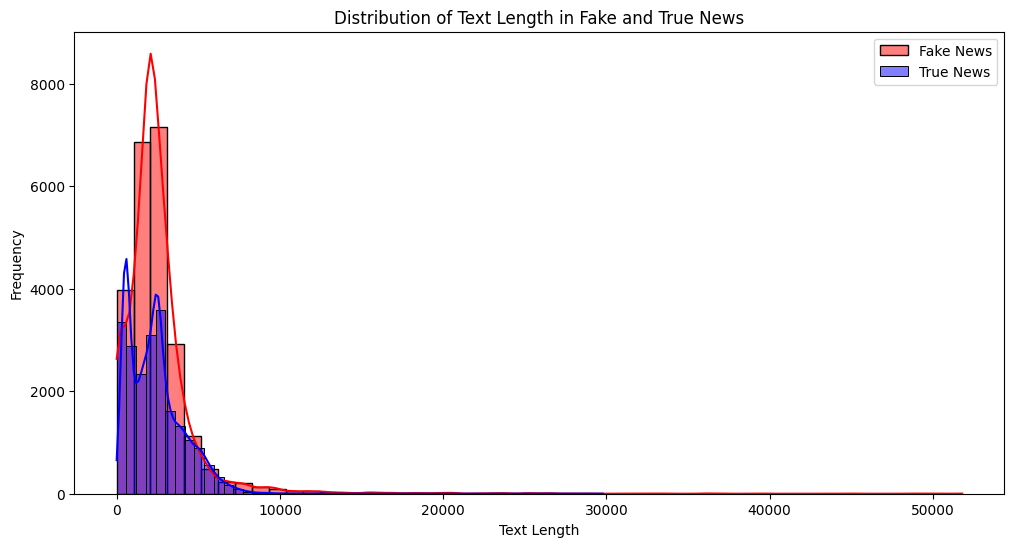

In [10]:
## count the length of the text in the fake and true news datasets
datafake_copy = data_fake.copy()
datatrue_copy = data_true.copy()
datafake_copy['text_length'] = datafake_copy['text'].apply(lambda x: len(str(x)))
datatrue_copy['text_length'] = datatrue_copy['text'].apply(lambda x: len(str(x)))
# Plotting the distribution of text length in fake and true news datasets
plt.figure(figsize=(12, 6))
sns.histplot(datafake_copy['text_length'], bins=50, color='red', label='Fake News', kde=True)
sns.histplot(datatrue_copy['text_length'], bins=50, color='blue', label='True News', kde=True)
plt.title('Distribution of Text Length in Fake and True News')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

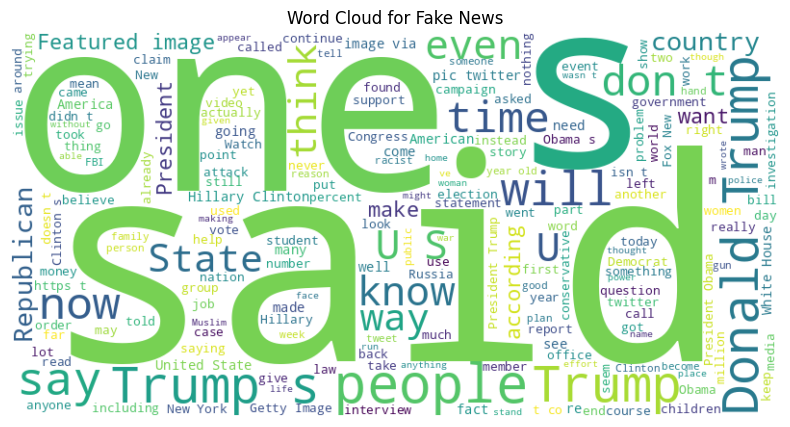

In [11]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
def plot_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
plot_wordcloud(data_fake, 'Word Cloud for Fake News')

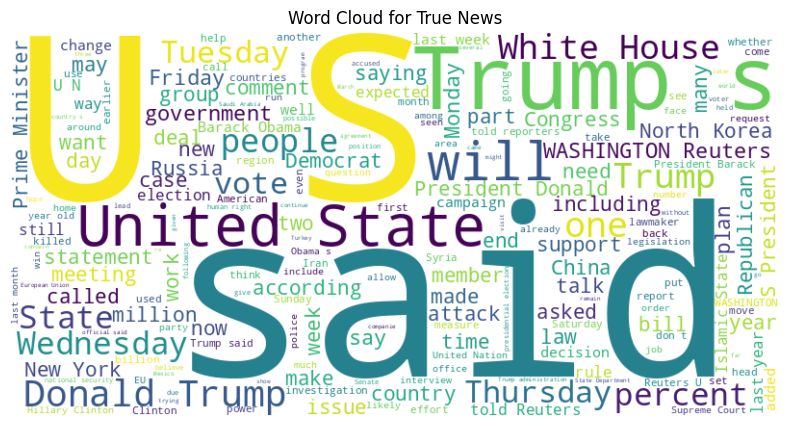

In [12]:
plot_wordcloud(data_true, 'Word Cloud for True News')

#### Attributes the labels on each article

In [13]:
data_fake['label'] = -1
data_true['label'] = 1

data = pd.concat([data_fake, data_true], ignore_index=True)
data = data[['title', 'text', 'label']]
display(data.head())

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,-1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,-1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",-1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",-1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,-1


In [15]:
data.shape

(44898, 3)

In [ ]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

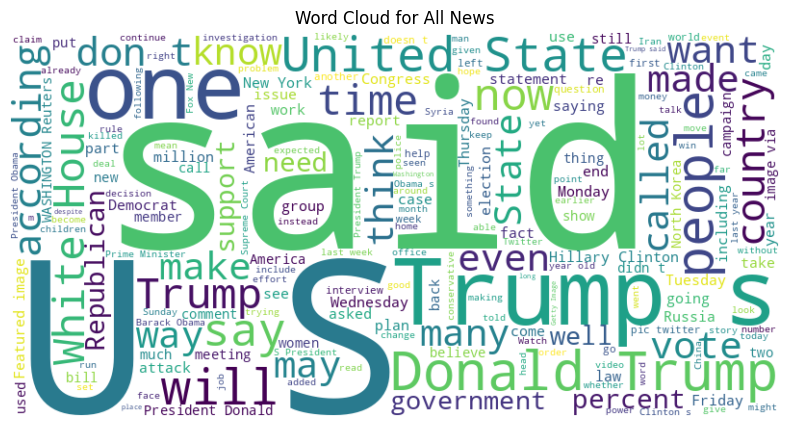

In [16]:
## groupement des mots significatifs
plot_wordcloud(data, 'Word Cloud for All News')

### Exploratory Data Analysis (EDA)

In [17]:
import string, re, nltk
from nltk.corpus import stopwords, wordnet
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))    

[nltk_data] Downloading package stopwords to /home/dona-
[nltk_data]     erick/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/dona-
[nltk_data]     erick/nltk_data...


In [18]:
## length of the text
data['text_length'] = data['text'].apply(lambda x: len(x.split()))
## statistqiues descriptives
print(f"Nombres d'articles : {len(data)}")
# Nombre de classe 
print(f"Nombre de classes : {data['label'].value_counts()}")
# groupement par label et analyse descriptives
print(data.groupby('label')['text_length'].describe())

Nombres d'articles : 44898
Nombre de classes : label
-1    23481
 1    21417
Name: count, dtype: int64
         count        mean         std  min    25%    50%    75%     max
label                                                                   
-1     23481.0  423.197905  408.388890  0.0  240.0  363.0  506.0  8135.0
 1     21417.0  385.640099  274.006204  0.0  148.0  359.0  525.0  5172.0


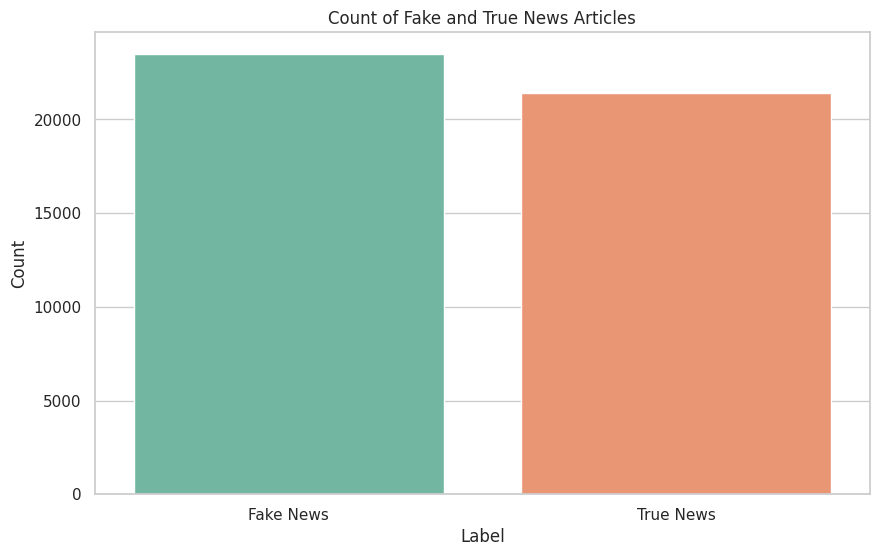

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Count of Fake and True News Articles')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fake News', 'True News'])
plt.show()


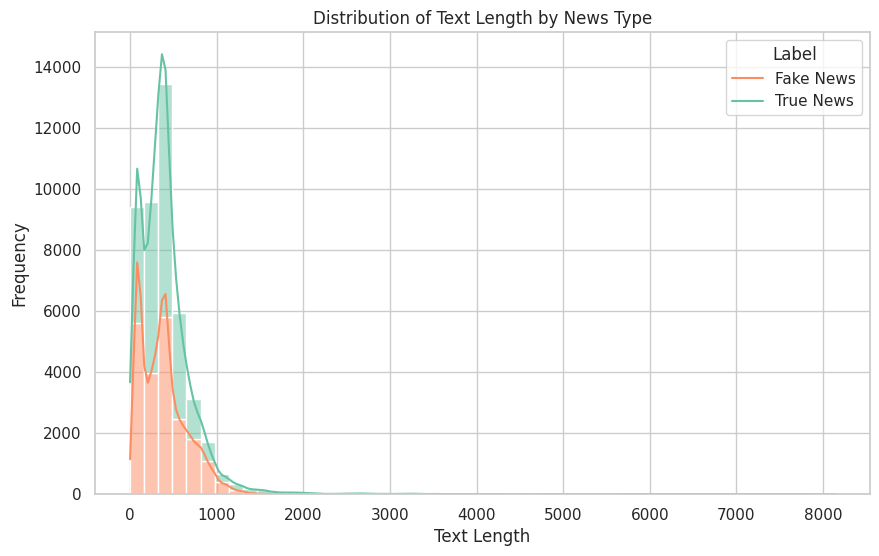

In [20]:
# Combine the datasets and add a label column
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='text_length', hue='label', multiple='stack', bins=50, palette='Set2', kde=True)
plt.title('Distribution of Text Length by News Type')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=['Fake News', 'True News'])
plt.show()

In [21]:
## nettoyage du texte
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ''.join([c for c in text if c not in string.punctuation])  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(clean_text)
# Display the first few rows of the cleaned text
print(data[['text', 'cleaned_text']].head())

                                                text                                       cleaned_text
0  Donald Trump just couldn t wish all Americans ...  donald trump wish americans happy new year lea...
1  House Intelligence Committee Chairman Devin Nu...  house intelligence committee chairman devin nu...
2  On Friday, it was revealed that former Milwauk...  friday revealed former milwaukee sheriff david...
3  On Christmas day, Donald Trump announced that ...  christmas day donald trump announced would bac...
4  Pope Francis used his annual Christmas Day mes...  pope francis used annual christmas day message...


#### Nuages des mots des fake_news et des vrais news après le nettoyage des données

```python
from wordcloud import WordCloud
import matplotlib.pyplot as plt

WordCloud for Fake News (Cleaned)


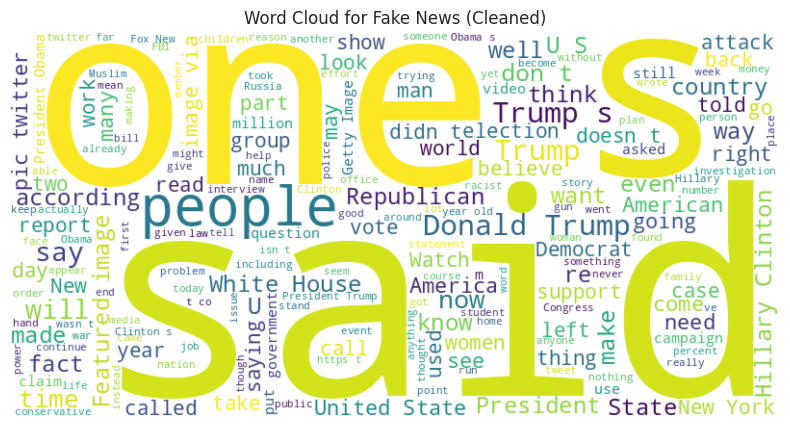

WordCloud for True News (Cleaned)


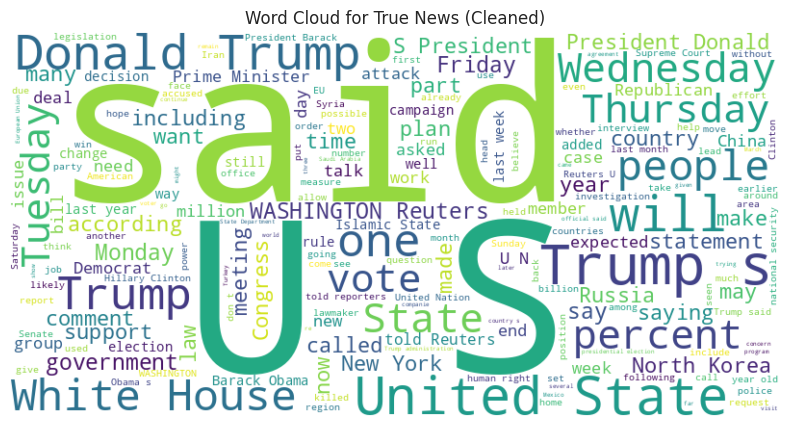

In [23]:
## des fakes news
print("WordCloud for Fake News (Cleaned)")
plot_wordcloud(data[data['label'] == -1], 'Word Cloud for Fake News (Cleaned)')

# True news
print("WordCloud for True News (Cleaned)")
plot_wordcloud(data[data['label'] == 1], 'Word Cloud for True News (Cleaned)')

#### Analyse semantiques

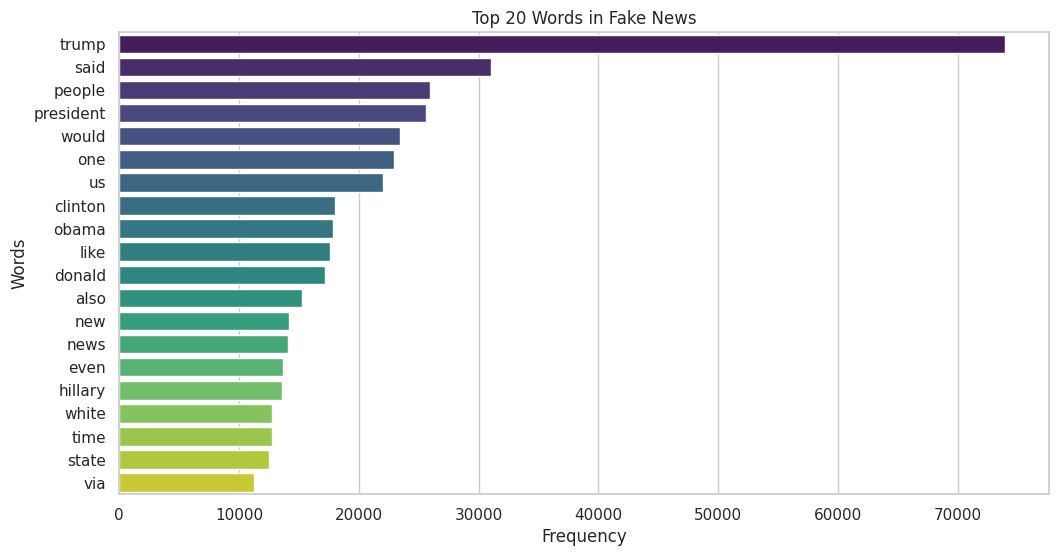

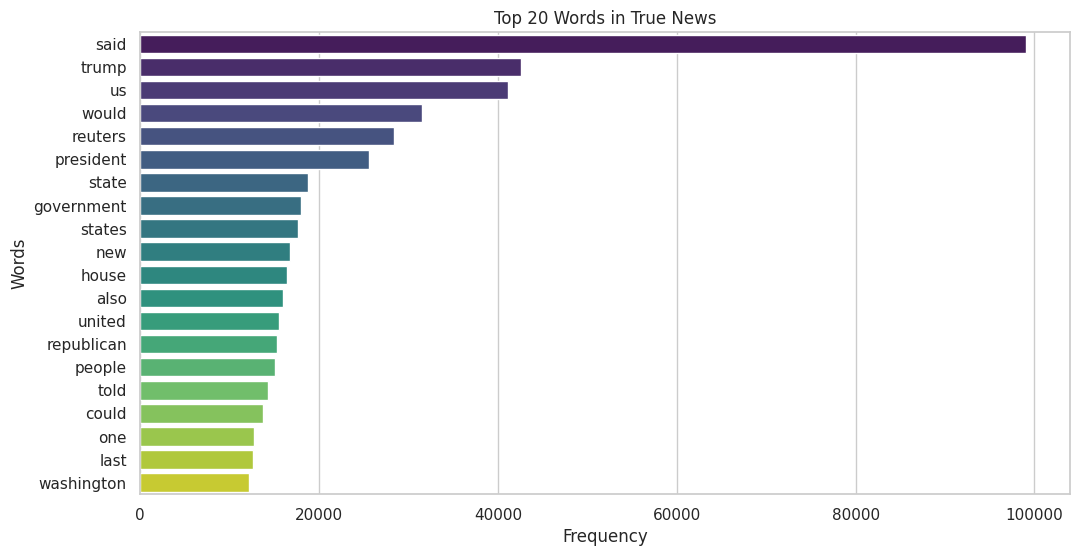

In [24]:
from collections import Counter # Count the frequency of words in the cleaned text
def analyse_semantic(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([c for c in text if c not in string.punctuation])  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

df = data.copy()
df['tokens'] = df['cleaned_text'].apply(lambda x: analyse_semantic(x))

# counter des mots pour identifier les mots les plus frequents dans les fake news et les true news
fake_words = [word for tokens in df[df['label'] == -1]['tokens'] for word in tokens]
true_words = [word for tokens in df[df['label'] == 1]['tokens'] for word in tokens]
fake_word_counts = Counter(fake_words)
true_word_counts = Counter(true_words)


def plot_top_words(word_counts, title, n=20):
    words, counts =zip(*word_counts.most_common(n))
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Plotting the top 20 words in fake and true news
plot_top_words(fake_word_counts, 'Top 20 Words in Fake News', n=20)
plot_top_words(true_word_counts, 'Top 20 Words in True News', n=20)

In [25]:
data.tail(10)

,title,text,label,text_length,cleaned_text
44888,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",1,319,sao paulo reuters cesar mata pires owner cofou...
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,1,706,geneva reuters north korea united states clash...
44890,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,1,666,geneva reuters north korea united states accus...
44891,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,1,301,copenhagen reuters danish police said tuesday ...
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,1,455,united nations reuters two north korean shipme...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1,466,brussels reuters nato allies tuesday welcomed ...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1,125,london reuters lexisnexis provider legal regul...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1,320,minsk reuters shadow disused sovietera factori...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1,205,moscow reuters vatican secretary state cardina...
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,1,210,jakarta reuters indonesia buy sukhoi fighter j...


#### Save the cleaned dataset

In [28]:
data = data[['title', 'cleaned_text', 'label']]

data.to_csv('cleaned_news_dataset.csv', index=False)
print("Cleaned dataset saved to 'cleaned_news_dataset.csv'.")

Cleaned dataset saved to 'cleaned_news_dataset.csv'.
